In [234]:
# import necessary Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evalution metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [193]:
#Load Dataset
churn_df = pd.read_csv(r"C:\Users\BUYPC COMPUTERS\Desktop\10Alytics\Course\Project\CAPE STONE PROJECT\Customer-Churn.csv")
df.head()    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [194]:
churn_df.shape

(7043, 21)

In [195]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning - Converting Object Data type to Float

In [197]:
# Convert a new column with the errors

churn_df['TotalChargesnum'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [198]:
# Find out missing data

churn_df[['TotalCharges', 'TotalChargesnum']].isnull().sum()

TotalCharges        0
TotalChargesnum    11
dtype: int64

In [199]:
# Get mean

churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalChargesnum
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [200]:
# Fill Blanks with Mean

churn_df.loc[churn_df['TotalCharges'] == ' ', 'TotalCharges'] = '2283.300441'

churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)


In [201]:
#drop column TotalChargesnum

churn_df.drop(columns = ['TotalChargesnum'], inplace=True)

In [202]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [203]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [204]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [205]:
#Senior Citizens or not (1=yes, 0=no)

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
churn_df['SeniorCitizens_cat'] = churn_df['SeniorCitizen'].apply(label)

churn_df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizens_cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [138]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'SeniorCitizens_cat'],
      dtype='object')

In [206]:
catcolumns = churn_df[['gender', 'SeniorCitizens_cat', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]
catcolumns.head()

,gender,SeniorCitizens_cat,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [207]:
numcolumns = churn_df[['tenure', 'MonthlyCharges', 'TotalCharges']]
numcolumns

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [208]:
#Univariate Analysis of Churn

countChurn = churn_df['Churn'].value_counts()
percentChurn = churn_df['Churn'].value_counts()/7043
print(countChurn,"\n",percentChurn,"%")

No     5174
Yes    1869
Name: Churn, dtype: int64 
 No     0.73463
Yes    0.26537
Name: Churn, dtype: float64 %


In [209]:
# Univariate Analysis of All Categorical Variables

for i, column in enumerate(catcolumns, 1):
    count = churn_df[column].value_counts()
    percent = churn_df[column].value_counts()/7043
    print(f'count of {column} = \n {count}')
    print(f'percentage of {column} = \n {percent}')

count of gender = 
 Male      3555
Female    3488
Name: gender, dtype: int64
percentage of gender = 
 Male      0.504756
Female    0.495244
Name: gender, dtype: float64
count of SeniorCitizens_cat = 
 No     5901
Yes    1142
Name: SeniorCitizens_cat, dtype: int64
percentage of SeniorCitizens_cat = 
 No     0.837853
Yes    0.162147
Name: SeniorCitizens_cat, dtype: float64
count of Partner = 
 No     3641
Yes    3402
Name: Partner, dtype: int64
percentage of Partner = 
 No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
count of Dependents = 
 No     4933
Yes    2110
Name: Dependents, dtype: int64
percentage of Dependents = 
 No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
count of PhoneService = 
 Yes    6361
No      682
Name: PhoneService, dtype: int64
percentage of PhoneService = 
 Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
count of MultipleLines = 
 No                  3390
Yes                 2971
No phone service     682
Name: Mul

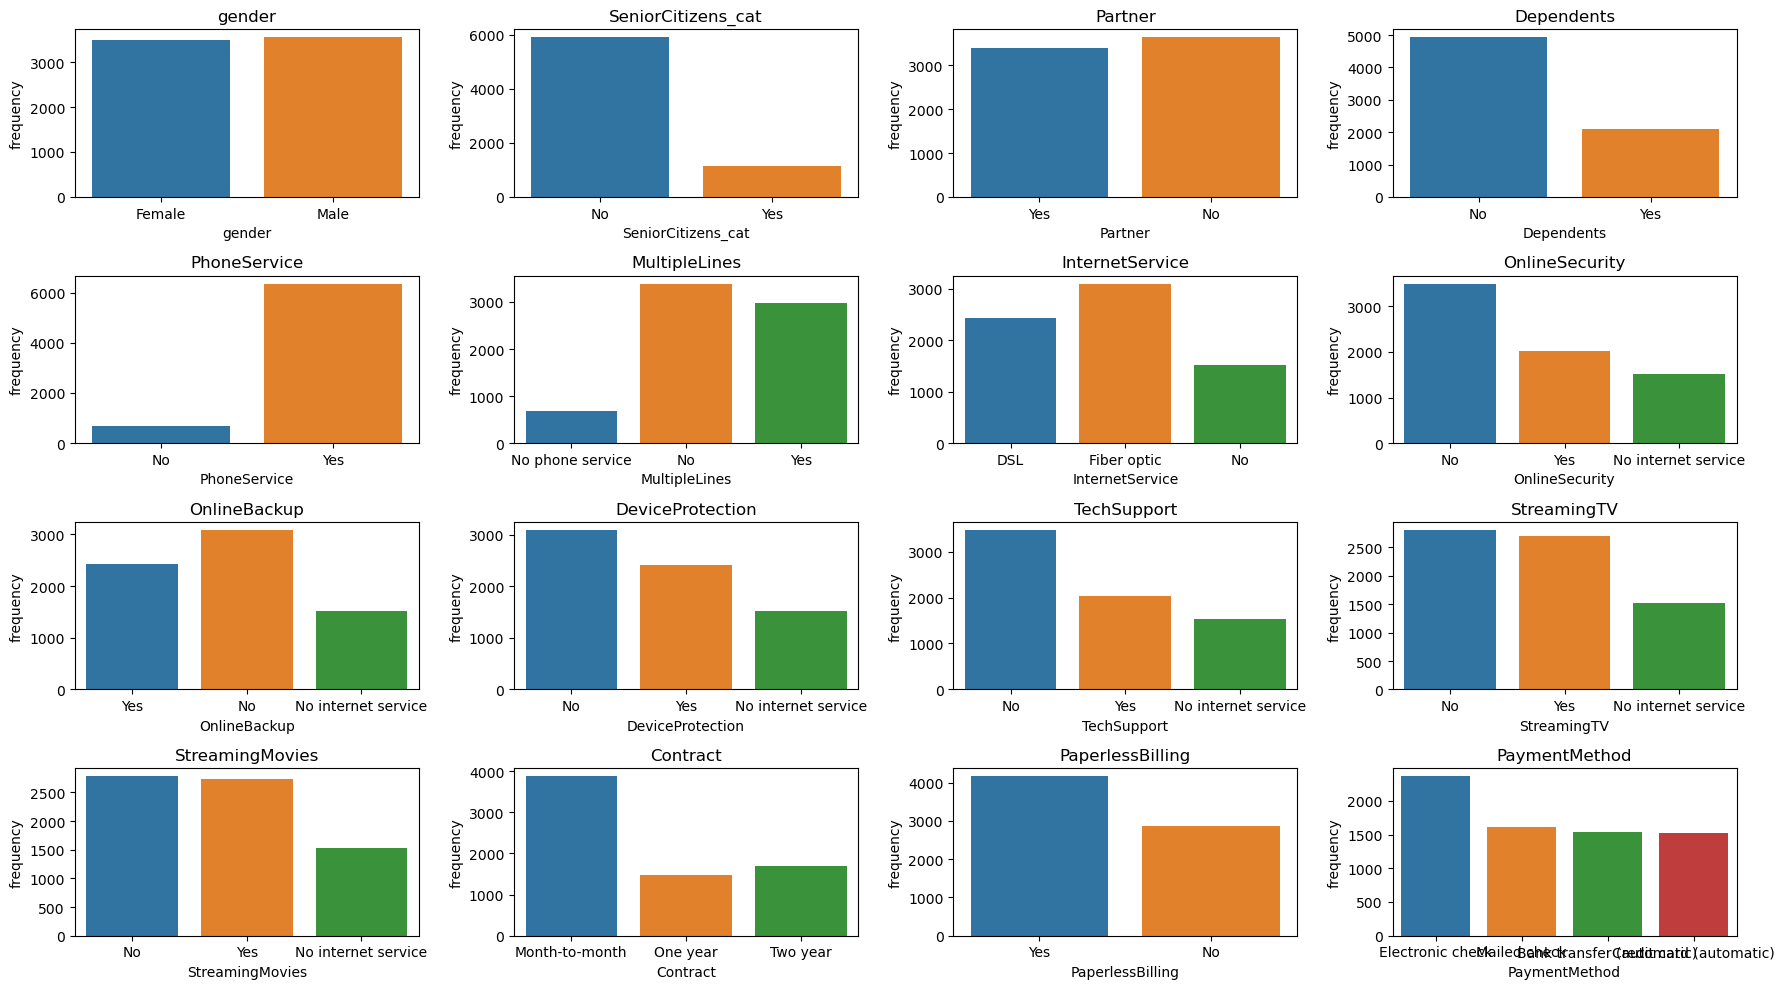

In [210]:
# Visualization of All Categorical Variables
plt.figure(figsize=(18,10))

for i, column in enumerate(catcolumns, 1):
    plt.subplot(4,4,i)
    sns.countplot(x = churn_df[column], data=churn_df)
    plt.title(f'{column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

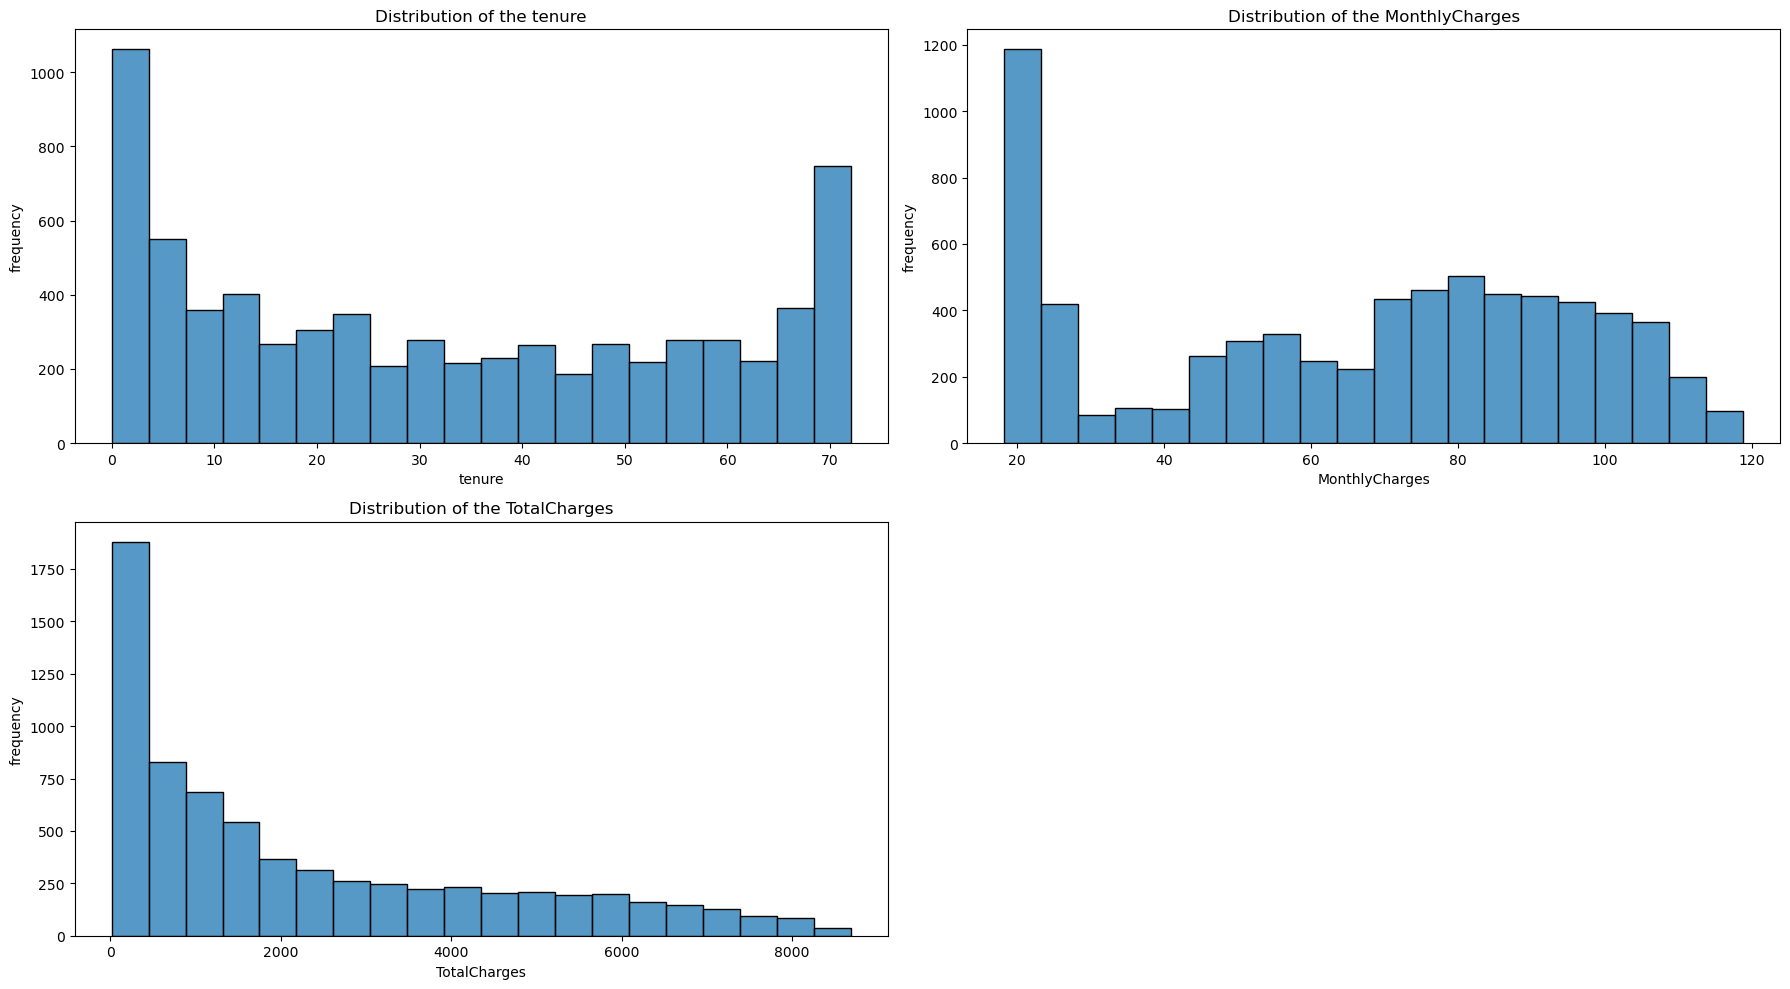

In [212]:
# Visualization of All Numeric Variables

plt.figure(figsize=(18,10))

for i, column in enumerate(numcolumns, 1):
    plt.subplot(2,2,i)
    sns.histplot(churn_df[column], bins=20)
    plt.title(f'Distribution of the {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

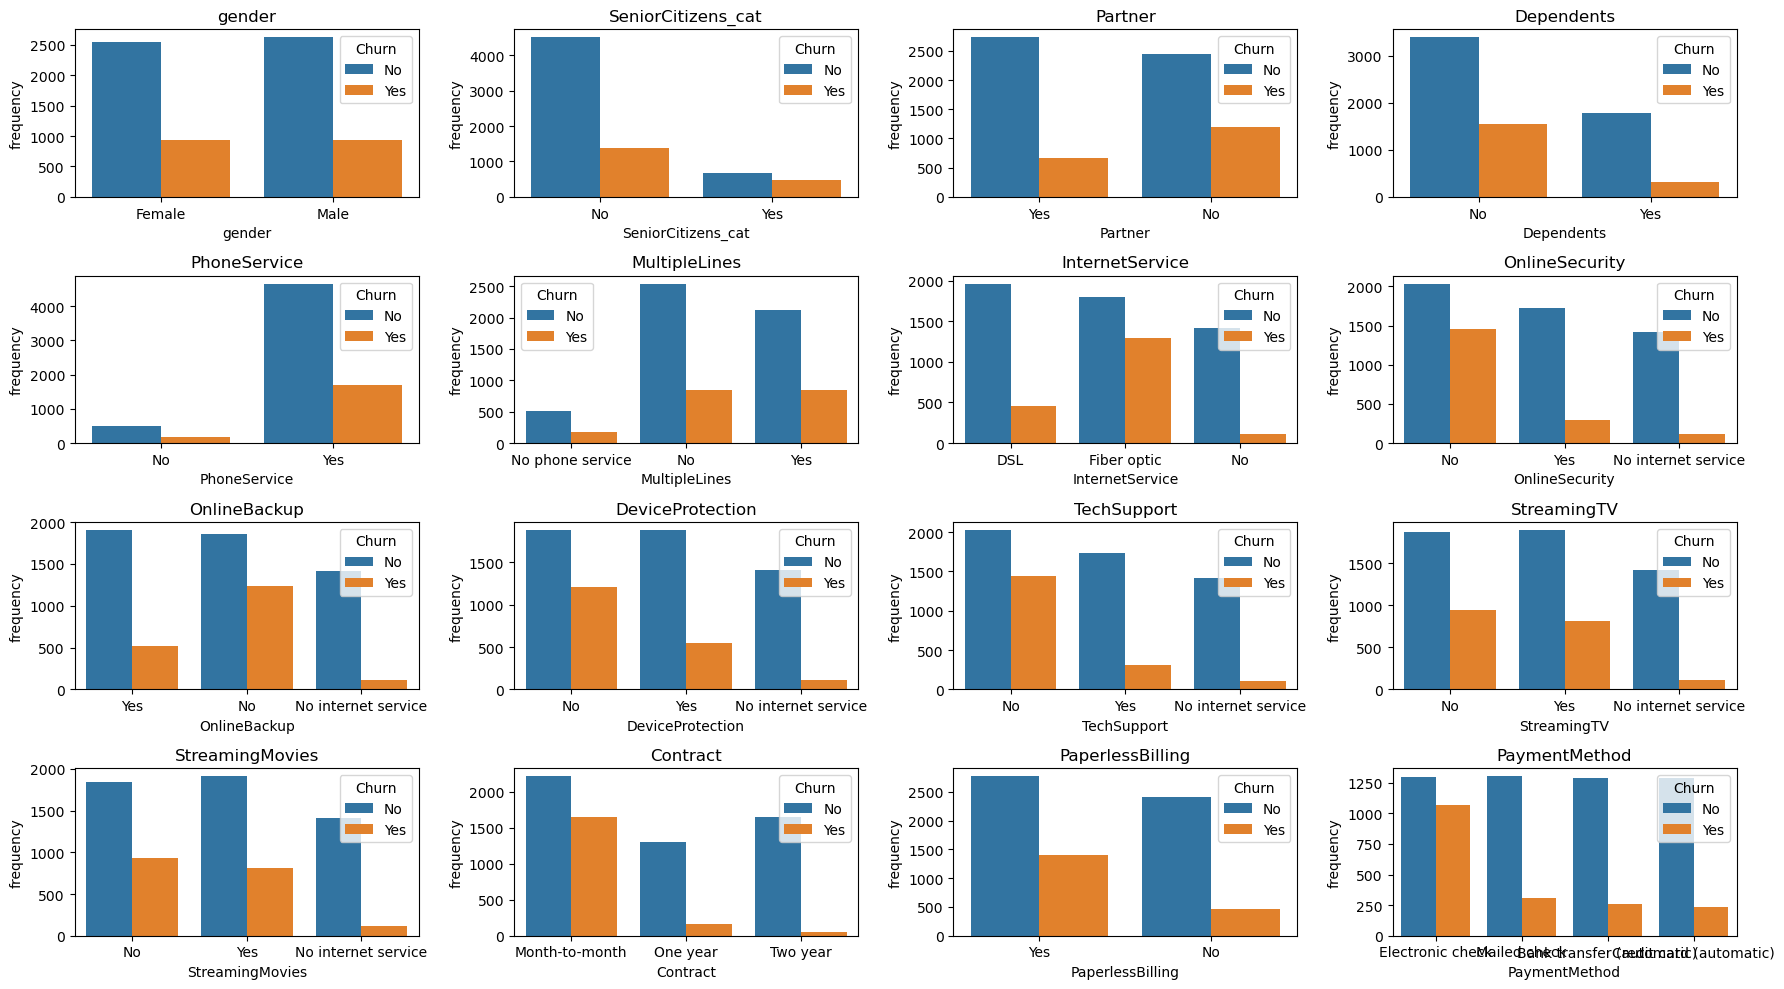

In [213]:
# Bivariate analysis - Pairplot

plt.figure(figsize=(18,10))

for i, column in enumerate(catcolumns, 1):
    plt.subplot(4,4,i)
    sns.countplot(x = churn_df[column], data=churn_df, hue='Churn')
    plt.title(f'{column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

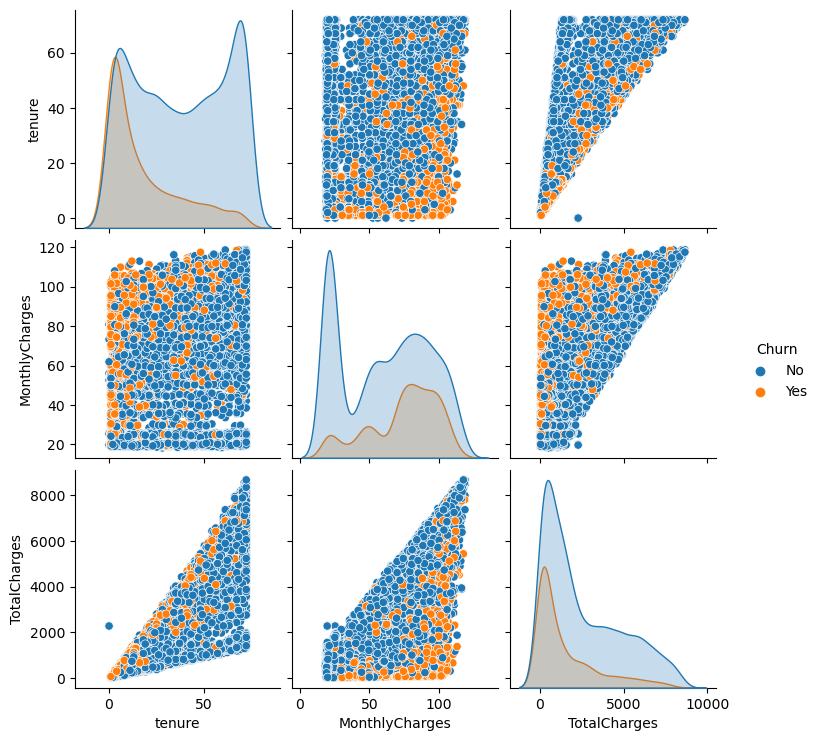

In [214]:
numcolumns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(churn_df[numcolumns], hue='Churn')
plt.show()

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102395
tenure               0.016567  1.000000        0.247900      0.824757
MonthlyCharges       0.220173  0.247900        1.000000      0.650468
TotalCharges         0.102395  0.824757        0.650468      1.000000


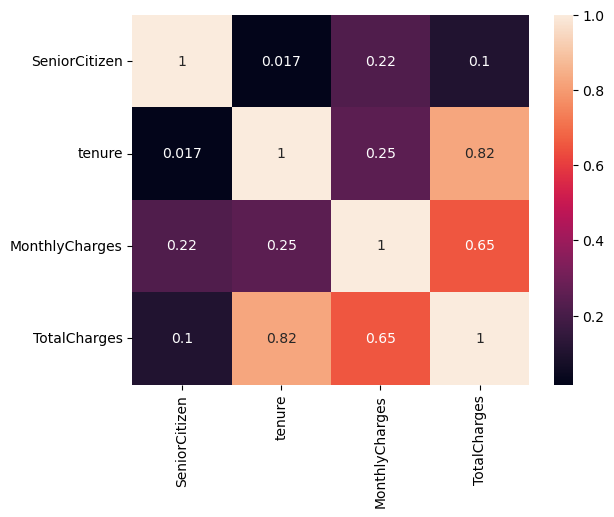

In [216]:
# Multivariate analysis - Correlation Heatmap

correlation_table = churn_df.corr()
print(correlation_table)

sns.heatmap(correlation_table, annot=True)
plt.show()

## Insights from Data

### Univariate Analysis
- Total number of records was 7043, out of which they recorded a 26% (1864) churning
- Most of the Customers (83%) were not Senior Citizens
- Most of the Customers (70%) had no Dependents
- Most of the Customers (90%) had Phone Service
- Most of the Customers (43%) use fibre optics for internet service
- 49% for the most of the customers had no online security
- 44% for the most of the customers had no online backup 
- 44% for the most of the customers had no Device Protection
- 49% for the most of the customers had no tech support
- 55% for the most of the customers were on a month to month contract
- 34% for the most of the customers used electronic check

### Bivariate Analysis
Most of the customer that churned
- Used fibre optics
- had no online security
- had no device protection
- had no online backup
- had no tech support
- were on a month to month contract 
- used electronic check

## Data Preprocessing

In [221]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical column
le = LabelEncoder()

churn_df["Encodedgender"] = le.fit_transform(churn_df['gender'])
churn_df["EncodedPartner"] = le.fit_transform(churn_df['Partner'])
churn_df["EncodedDependents"] = le.fit_transform(churn_df['Dependents'])
churn_df["EncodedPhoneService"] = le.fit_transform(churn_df['PhoneService'])
churn_df["EncodedMultipleLines"] = le.fit_transform(churn_df['MultipleLines'])
churn_df["EncodedInternetService"] = le.fit_transform(churn_df['InternetService'])
churn_df["EncodedOnlineSecurity"] = le.fit_transform(churn_df['OnlineSecurity'])
churn_df["EncodedOnlineBackup"] = le.fit_transform(churn_df['OnlineBackup'])
churn_df["EncodedDeviceProtection"] = le.fit_transform(churn_df['DeviceProtection'])
churn_df["EncodedTechSupport"] = le.fit_transform(churn_df['TechSupport'])
churn_df["EncodedStreamingTV"] = le.fit_transform(churn_df['StreamingTV'])
churn_df["EncodedStreamingMovies"] = le.fit_transform(churn_df['StreamingMovies'])
churn_df["EncodedContract"] = le.fit_transform(churn_df['Contract'])
churn_df["EncodedPaperlessBilling"] = le.fit_transform(churn_df['PaperlessBilling'])
churn_df["EncodedPaymentMethod"] = le.fit_transform(churn_df['PaymentMethod'])

In [222]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,EncodedOnlineSecurity,EncodedOnlineBackup,EncodedTechSupport,EncodedStreamingTV,EncodedStreamingMovies,EncodedContract,EncodedPaperlessBilling,EncodedPaymentMethod,EncodedMultipleLines,EncodedDeviceProtection
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,2,0,0,0,0,1,2,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2,0,0,0,0,1,0,3,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2,2,0,0,0,0,1,3,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,2,0,2,0,0,1,0,0,1,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,1,2,0,0


In [224]:
MLfeatures = churn_df[['MonthlyCharges', 'TotalCharges', 'tenure',
       'SeniorCitizen', 'Encodedgender', 'EncodedPartner',
       'EncodedDependents', 'EncodedPhoneService', 'EncodedInternetService',
       'EncodedOnlineSecurity', 'EncodedOnlineBackup', 'EncodedTechSupport',
       'EncodedStreamingTV', 'EncodedStreamingMovies', 'EncodedContract',
       'EncodedPaperlessBilling', 'EncodedPaymentMethod',
       'EncodedMultipleLines', 'EncodedDeviceProtection']]

label = churn_df[['Churn']]

In [226]:
# Dealing with outliers - tenure, monthlycharge, Totalcharge   

#Normalize the data

scaler = MinMaxScaler()
MLfeatures["Scaled_tenure"] = scaler.fit_transform(MLfeatures['tenure'].values.reshape(-1, 1))
MLfeatures["Scaled_MonthlyCharges"] = scaler.fit_transform(MLfeatures['MonthlyCharges'].values.reshape(-1, 1))
MLfeatures["Scaled_TotalCharges"] = scaler.fit_transform(MLfeatures['TotalCharges'].values.reshape(-1, 1))

MLfeatures.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

MLfeatures.head()

,SeniorCitizen,Encodedgender,EncodedPartner,EncodedDependents,EncodedPhoneService,EncodedInternetService,EncodedOnlineSecurity,EncodedOnlineBackup,EncodedTechSupport,EncodedStreamingTV,EncodedStreamingMovies,EncodedContract,EncodedPaperlessBilling,EncodedPaymentMethod,EncodedMultipleLines,EncodedDeviceProtection,Scaled_tenure,Scaled_MonthlyCharges,Scaled_TotalCharges
0,0,0,1,0,0,0,0,2,0,0,0,0,1,2,1,0,0.013889,0.115423,0.001275
1,0,1,0,0,1,0,2,0,0,0,0,1,0,3,0,2,0.472222,0.385075,0.215867
2,0,1,0,0,1,0,2,2,0,0,0,0,1,3,0,0,0.027778,0.354229,0.010310
3,0,1,0,0,0,0,2,0,2,0,0,1,0,0,1,2,0.625000,0.239303,0.210241
4,0,0,0,0,1,1,0,0,0,0,0,0,1,2,0,0,0.027778,0.521891,0.015330


## Machine Learning

In [228]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(MLFeatures, label, test_size=0.2, random_state=42)

In [229]:
#8 Machine Learning Algorithms will be applied to the dataset
classifiers = [[RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'], 
               [SVC(), 'SVC'],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [237]:
acc_list = {}
cm_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    cm_list[model_name] = cm
    
    if model_name != classifiers[-1][1]:
        print('')

In [238]:
acc_list

{'Random Forest': ['79.49%'],
 'K-Nearest Neighbours': ['76.86%'],
 'SGD Classifier': ['79.49%'],
 'SVC': ['80.41%'],
 'Decision tree': ['72.82%'],
 'Logistic Regression': ['81.55%']}

In [239]:
print("Accuracy")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy


,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Decision tree,Logistic Regression
0,79.49%,76.86%,79.49%,80.41%,72.82%,81.55%


In [240]:
cm_list

{'Random Forest': array([[947,  89],
        [200, 173]], dtype=int64),
 'K-Nearest Neighbours': array([[893, 143],
        [183, 190]], dtype=int64),
 'SGD Classifier': array([[942,  94],
        [195, 178]], dtype=int64),
 'SVC': array([[949,  87],
        [189, 184]], dtype=int64),
 'Decision tree': array([[833, 203],
        [180, 193]], dtype=int64),
 'Logistic Regression': array([[933, 103],
        [157, 216]], dtype=int64)}

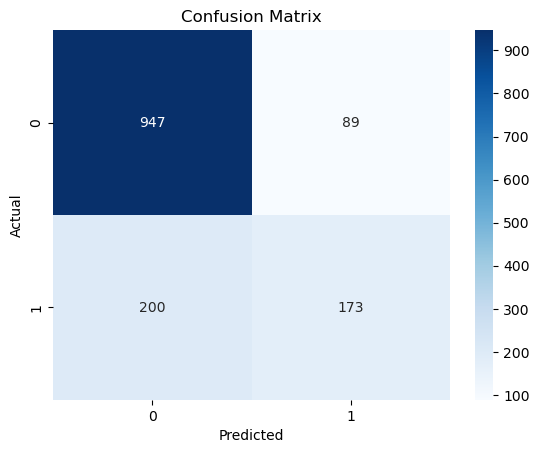

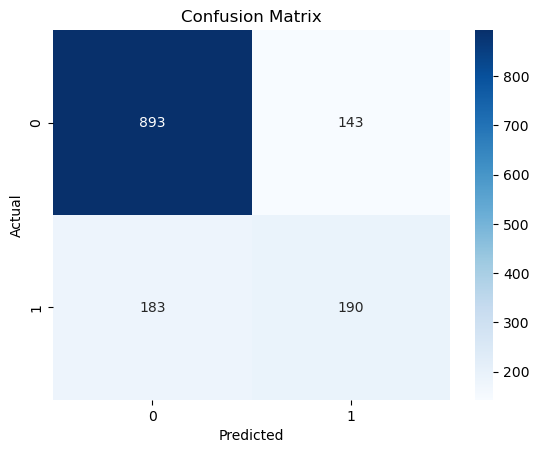

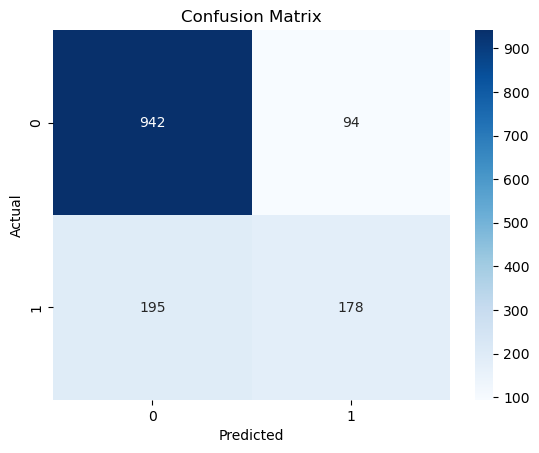

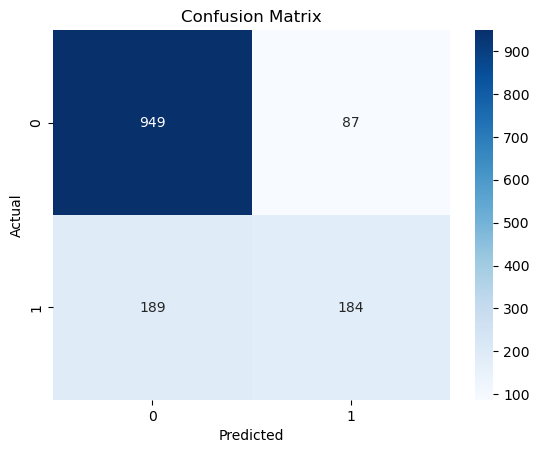

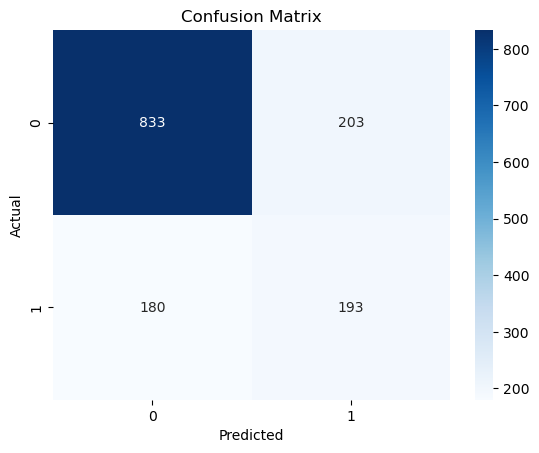

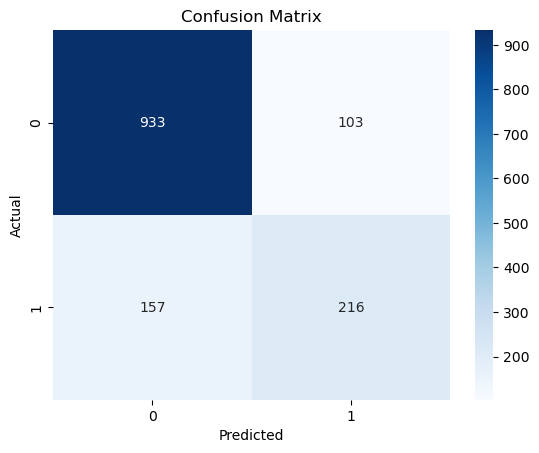

In [246]:
for cm in cm_list.values():
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title('Confusion Matrix')
    plt.show()

Among the six models trained for this project which were Random Forest, Decision Tree, SVC, SGD Classifier, K-Nearest Neighbours and Logistics Regression, the Logistic Regression model produced the highest accuracy of 81.55%. In computing the confusion matrix, it also gave the lowest error in predicting customers that have churned.